In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
from sklearn.pipeline import Pipeline
 # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin 
# To create a box-cox transformation class
from collections import Counter

In [3]:
import pandas as pd

file_path = r"C:\Users\SONY\Downloads\zomato.csv"
df_1 = pd.read_csv(file_path, encoding='latin1')
df_1.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
import pandas as pd

file_path = r"C:\Users\SONY\Downloads\Country-Code.xlsx"

df_2 = pd.read_excel(file_path)
df_2.head()




,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [12]:
df=pd.merge(df_1,df_2)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [14]:
df.shape

(9551, 22)

In [16]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [17]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [18]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


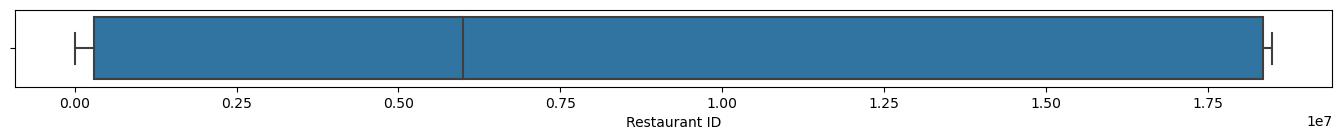

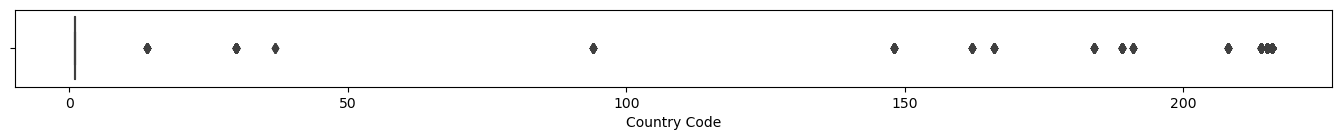

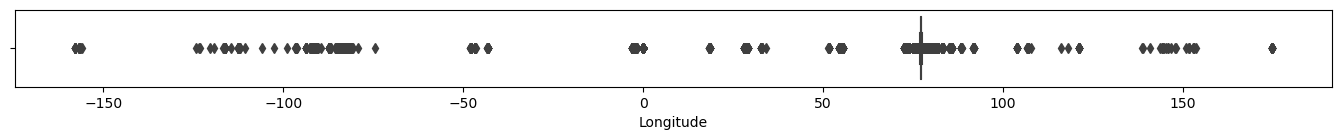

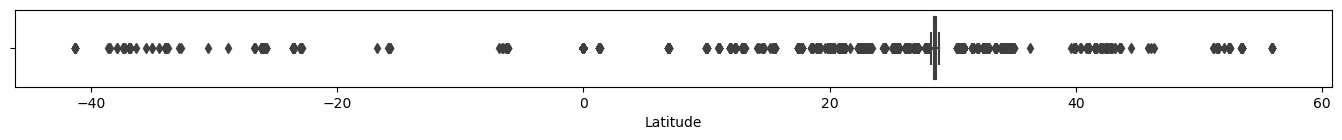

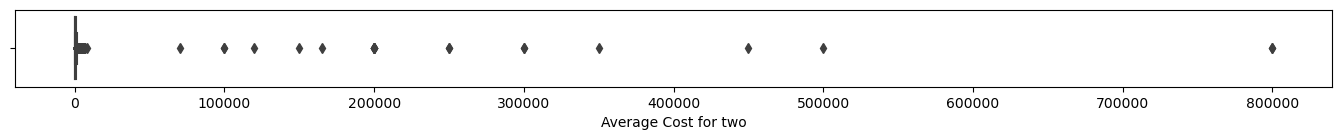

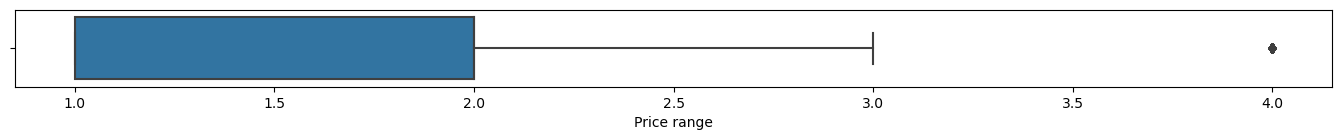

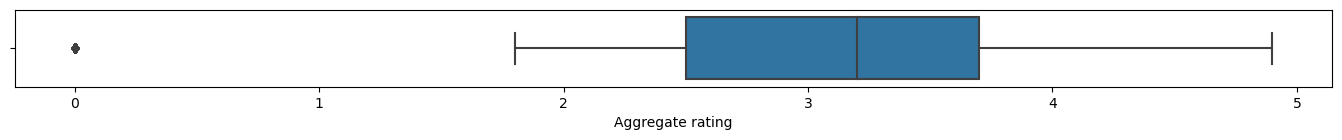

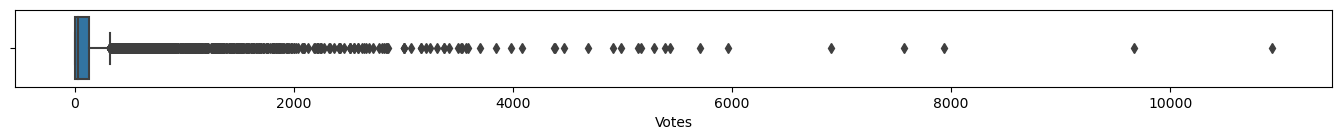

In [19]:
df_3=df.select_dtypes(exclude=['object'])
for column in df_3:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

In [20]:
Q1=df['Longitude'].quantile(0.25)
Q2=df['Longitude'].quantile(0.5)
Q3=df['Longitude'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

76.780348175
77.58300117500002


In [22]:
df['Longitude'] = np.where(df['Longitude']> upplim,upplim,
                        np.where(df['Longitude']<lowlim,lowlim, df['Longitude']))

In [23]:
Q1=df['Latitude'].quantile(0.25)
Q2=df['Latitude'].quantile(0.5)
Q3=df['Latitude'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

28.232644200000003
28.888826599999994


In [24]:
df['Latitude'] = np.where(df['Latitude']> upplim,upplim,
                        np.where(df['Latitude']<lowlim,lowlim, df['Latitude']))

In [25]:
Q1=df['Average Cost for two'].quantile(0.25)
Q2=df['Average Cost for two'].quantile(0.5)
Q3=df['Average Cost for two'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-425.0
1375.0


In [26]:
df['Average Cost for two'] = np.where(df['Average Cost for two']> upplim,upplim,
                        np.where(df['Average Cost for two']<lowlim,lowlim, df['Average Cost for two']))

In [27]:
Q1=df['Price range'].quantile(0.25)
Q2=df['Price range'].quantile(0.5)
Q3=df['Price range'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-0.5
3.5


In [28]:
df['Price range'] = np.where(df['Price range']> upplim,upplim,
                        np.where(df['Price range']<lowlim,lowlim, df['Price range']))

In [29]:
Q1=df['Aggregate rating'].quantile(0.25)
Q2=df['Aggregate rating'].quantile(0.5)
Q3=df['Aggregate rating'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

0.6999999999999997
5.5


In [30]:
df['Aggregate rating'] = np.where(df['Aggregate rating']> upplim,upplim,
                        np.where(df['Aggregate rating']<lowlim,lowlim, df['Aggregate rating']))

In [31]:
Q1=df['Votes'].quantile(0.25)
Q2=df['Votes'].quantile(0.5)
Q3=df['Votes'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-184.0
320.0


In [32]:
df['Votes'] = np.where(df['Votes']> upplim,upplim,
                        np.where(df['Votes']<lowlim,lowlim, df['Votes']))

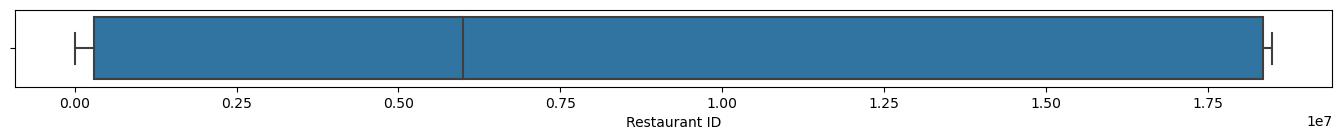

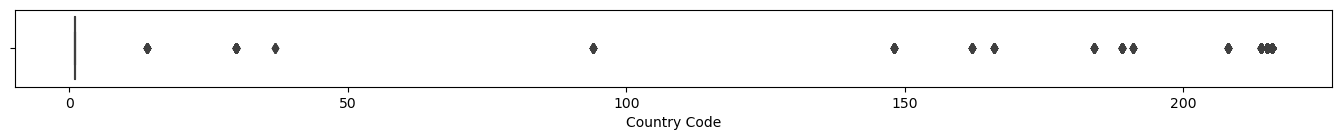

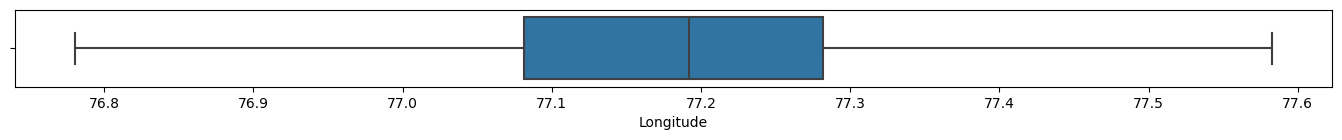

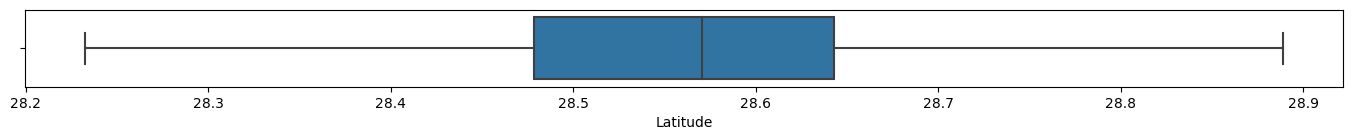

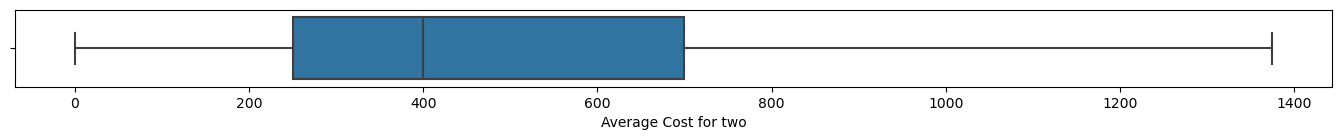

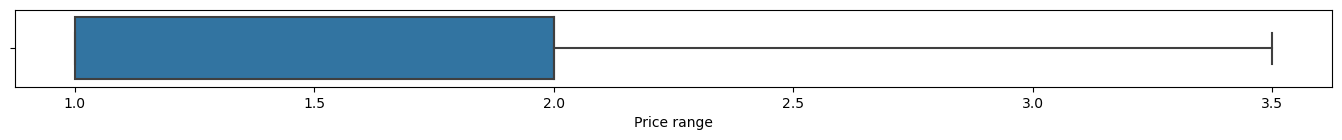

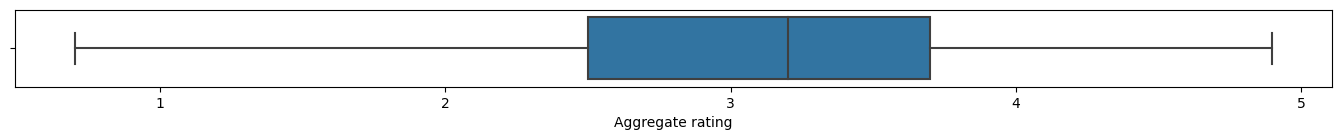

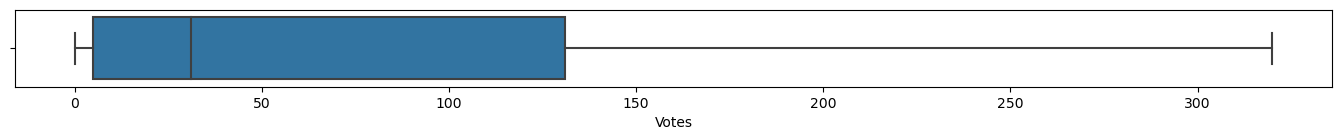

In [33]:
df_3=df.select_dtypes(exclude=['object'])
for column in df_3:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

In [34]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')

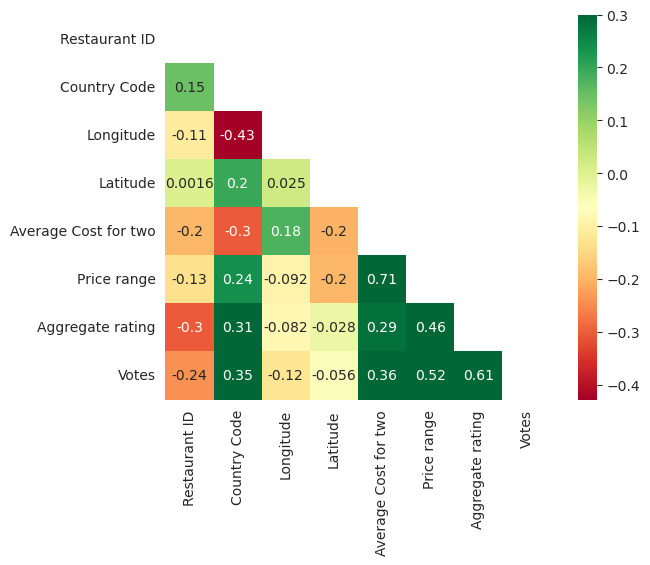

In [36]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

In [37]:
df.Currency.unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])


In [42]:
df.dtypes

Restaurant ID             int64
Restaurant Name           int32
Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Locality Verbose          int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two    float64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Switch to order menu      int32
Price range             float64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                   float64
Country                   int32
dtype: object

In [43]:
X = df.drop('Average Cost for two', axis=1)
Y = df['Average Cost for two']

In [44]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# Data Modelling

1:KNeighborsRegressor

In [49]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [50]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [51]:
y_pred_1= knn.predict(X_test)


In [52]:
print("Training Accuracy : {}%".format(knn.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(knn.score(X_test, Y_test) * 100))

Training Accuracy : 88.43065711099045%
Testing Accuracy  : 81.94558958610996%


DecisionTreeRegressor

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
y_pred_2=dtr.predict(X_test)

In [54]:
print("Training Accuracy : {}%".format(dtr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(dtr.score(X_test, Y_test) * 100))

Training Accuracy : 100.0%
Testing Accuracy  : 85.97674770936125%


RandomForestRegressor

In [55]:
rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
y_pred_3=rdr.predict(X_test)

In [56]:
print("Training Accuracy : {}%".format(rdr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(rdr.score(X_test, Y_test) * 100))

Training Accuracy : 99.03541033120146%
Testing Accuracy  : 92.91861253456366%


LinearRegression

In [57]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_4=lr.predict(X_test)

In [58]:
print("Training Accuracy : {}%".format(lr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(lr.score(X_test, Y_test) * 100))

Training Accuracy : 82.43453754309918%
Testing Accuracy  : 80.37273937422185%


# model evaluation

In [64]:
print('KNN Regressor:')
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_1)
print('R-squared (R2) Score:', round(r2, 2))



KNN Regressor:
R-squared (R2) Score: 0.82


In [62]:
print('Decision Tree Regressor:')


r2 = r2_score(Y_test, y_pred_2)
print('R-squared (R2) Score:', round(r2, 2))


Decision Tree Regressor:
R-squared (R2) Score: 0.86


In [65]:
print('RandomForestRegressor')

r2 = r2_score(Y_test, y_pred_3)
print('R-squared (R2) Score:', round(r2, 2))


RandomForestRegressor
R-squared (R2) Score: 0.93


In [66]:
print('LinearRegression')


r2 = r2_score(Y_test, y_pred_4)
print('R-squared (R2) Score:', round(r2, 2))

LinearRegression
R-squared (R2) Score: 0.8


2nd part

In [75]:
X = df.drop('Price range', axis=1)
Y = df['Price range']

In [76]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


Data Modelling
1:KNeighborsRegressor

In [78]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [79]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [80]:
y_pred_1= knn.predict(X_test)


In [81]:
print("Training Accuracy : {}%".format(knn.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(knn.score(X_test, Y_test) * 100))

Training Accuracy : 81.73196464948177%
Testing Accuracy  : 73.73776864469102%


DecisionTreeRegressor

In [82]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
y_pred_2=dtr.predict(X_test)

In [83]:
print("Training Accuracy : {}%".format(dtr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(dtr.score(X_test, Y_test) * 100))

Training Accuracy : 100.0%
Testing Accuracy  : 96.8403891444754%


In [84]:
#RandomForestRegressor

rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
y_pred_3=rdr.predict(X_test)
print("Training Accuracy : {}%".format(rdr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(rdr.score(X_test, Y_test) * 100))

Training Accuracy : 99.74399821493003%
Testing Accuracy  : 98.21716403300584%


In [86]:
#LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_4=lr.predict(X_test)
print("Training Accuracy : {}%".format(lr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(lr.score(X_test, Y_test) * 100))


Training Accuracy : 78.71487564436039%
Testing Accuracy  : 77.21611142038569%


# model evaluation

In [87]:
print('KNN Regressor:')
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_1)
print('R-squared (R2) Score:', round(r2, 2))


KNN Regressor:
R-squared (R2) Score: 0.74


In [88]:
print('Decision Tree Regressor:')


r2 = r2_score(Y_test, y_pred_2)
print('R-squared (R2) Score:', round(r2, 2))


Decision Tree Regressor:
R-squared (R2) Score: 0.97


In [89]:
print('RandomForestRegressor')

r2 = r2_score(Y_test, y_pred_3)
print('R-squared (R2) Score:', round(r2, 2))


RandomForestRegressor
R-squared (R2) Score: 0.98


In [90]:
print('LinearRegression')


r2 = r2_score(Y_test, y_pred_4)
print('R-squared (R2) Score:', round(r2, 2))

LinearRegression
R-squared (R2) Score: 0.77


conclusion :
In both the cases we can check that randomforestregressor is giving the highest accuracy . 